In [47]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import autokeras as ak
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns

In [48]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [49]:
train['class'].value_counts()

B    114
C     79
A     69
Name: class, dtype: int64

In [50]:
train.columns

Index(['id', 'father', 'mother', 'gender', 'trait', 'SNP_01', 'SNP_02',
       'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
       'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15', 'class'],
      dtype='object')

In [51]:
for idx in range(1,10):
    for i in range(len(train)):
        train.loc[i,f'SNP_0{idx}_x'] = train.loc[i,f'SNP_0{idx}'].split()[0]
        train.loc[i,f'SNP_0{idx}_y'] = train.loc[i,f'SNP_0{idx}'].split()[1]
        train.loc[i,f'SNP_0{idx}_x_y'] = train.loc[i,f'SNP_0{idx}'].split()[1]
        train.loc[i,f'SNP_0{idx}_y_x'] = train.loc[i,f'SNP_0{idx}'].split()[0]
for idx in range(10,16):
    for i in range(len(train)):
        train.loc[i,f'SNP_{idx}_x'] = train.loc[i,f'SNP_{idx}'].split()[0]
        train.loc[i,f'SNP_{idx}_y'] = train.loc[i,f'SNP_{idx}'].split()[1]
        train.loc[i,f'SNP_{idx}_x_y'] = train.loc[i,f'SNP_{idx}'].split()[1]
        train.loc[i,f'SNP_{idx}_y_x'] = train.loc[i,f'SNP_{idx}'].split()[0]

for idx in range(1,10):
    for i in range(len(test)):
        test.loc[i,f'SNP_0{idx}_x'] = test.loc[i,f'SNP_0{idx}'].split()[0]
        test.loc[i,f'SNP_0{idx}_y'] = test.loc[i,f'SNP_0{idx}'].split()[1]
        test.loc[i,f'SNP_0{idx}_x_y'] = test.loc[i,f'SNP_0{idx}'].split()[1]
        test.loc[i,f'SNP_0{idx}_y_x'] = test.loc[i,f'SNP_0{idx}'].split()[0]
for idx in range(10,16):
    for i in range(len(test)):
        test.loc[i,f'SNP_{idx}_x'] = test.loc[i,f'SNP_{idx}'].split()[0]
        test.loc[i,f'SNP_{idx}_y'] = test.loc[i,f'SNP_{idx}'].split()[1]
        test.loc[i,f'SNP_{idx}_x_y'] = test.loc[i,f'SNP_{idx}'].split()[1]
        test.loc[i,f'SNP_{idx}_y_x'] = test.loc[i,f'SNP_{idx}'].split()[0]      
        
train.columns



Index(['id', 'father', 'mother', 'gender', 'trait', 'SNP_01', 'SNP_02',
       'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
       'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15', 'class',
       'SNP_01_x', 'SNP_01_y', 'SNP_01_x_y', 'SNP_01_y_x', 'SNP_02_x',
       'SNP_02_y', 'SNP_02_x_y', 'SNP_02_y_x', 'SNP_03_x', 'SNP_03_y',
       'SNP_03_x_y', 'SNP_03_y_x', 'SNP_04_x', 'SNP_04_y', 'SNP_04_x_y',
       'SNP_04_y_x', 'SNP_05_x', 'SNP_05_y', 'SNP_05_x_y', 'SNP_05_y_x',
       'SNP_06_x', 'SNP_06_y', 'SNP_06_x_y', 'SNP_06_y_x', 'SNP_07_x',
       'SNP_07_y', 'SNP_07_x_y', 'SNP_07_y_x', 'SNP_08_x', 'SNP_08_y',
       'SNP_08_x_y', 'SNP_08_y_x', 'SNP_09_x', 'SNP_09_y', 'SNP_09_x_y',
       'SNP_09_y_x', 'SNP_10_x', 'SNP_10_y', 'SNP_10_x_y', 'SNP_10_y_x',
       'SNP_11_x', 'SNP_11_y', 'SNP_11_x_y', 'SNP_11_y_x', 'SNP_12_x',
       'SNP_12_y', 'SNP_12_x_y', 'SNP_12_y_x', 'SNP_13_x', 'SNP_13_y',
       'SNP_13_x_y', 'SNP_13_y_x', 'SNP_14_x', 'SNP_14_y'

In [52]:
train

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_13_x_y,SNP_13_y_x,SNP_14_x,SNP_14_y,SNP_14_x_y,SNP_14_y_x,SNP_15_x,SNP_15_y,SNP_15_x_y,SNP_15_y_x
0,TRAIN_000,0,0,0,2,G G,A G,A A,G A,C A,...,A,A,A,A,A,A,A,A,A,A
1,TRAIN_001,0,0,0,2,A G,A G,C A,A A,A A,...,G,G,A,A,A,A,A,A,A,A
2,TRAIN_002,0,0,0,2,G G,G G,A A,G A,C C,...,A,A,A,A,A,A,A,A,A,A
3,TRAIN_003,0,0,0,1,A A,G G,A A,G A,A A,...,G,G,A,A,A,A,G,G,G,G
4,TRAIN_004,0,0,0,2,G G,G G,C C,A A,C C,...,G,A,A,A,A,A,G,A,A,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,TRAIN_257,0,0,0,2,A G,A G,A A,G A,C C,...,A,A,A,A,A,A,A,A,A,A
258,TRAIN_258,0,0,0,2,G G,A A,C A,A A,A A,...,G,A,A,A,A,A,G,A,A,G
259,TRAIN_259,0,0,0,1,A G,G G,A A,G A,A A,...,G,G,C,A,A,C,G,G,G,G
260,TRAIN_260,0,0,0,1,A A,G G,A A,G A,A A,...,G,G,C,A,A,C,G,G,G,G


In [53]:
# train = train[train['class']!='A']
# test = test[test['trait']==2]
le = preprocessing.LabelEncoder()
tar = ['SNP_01', 'SNP_02',
       'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
       'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15',
      'SNP_01_x', 'SNP_01_y', 'SNP_01_x_y', 'SNP_01_y_x', 'SNP_02_x',
       'SNP_02_y', 'SNP_02_x_y', 'SNP_02_y_x', 'SNP_03_x', 'SNP_03_y',
       'SNP_03_x_y', 'SNP_03_y_x', 'SNP_04_x', 'SNP_04_y', 'SNP_04_x_y',
       'SNP_04_y_x', 'SNP_05_x', 'SNP_05_y', 'SNP_05_x_y', 'SNP_05_y_x',
       'SNP_06_x', 'SNP_06_y', 'SNP_06_x_y', 'SNP_06_y_x', 'SNP_07_x',
       'SNP_07_y', 'SNP_07_x_y', 'SNP_07_y_x', 'SNP_08_x', 'SNP_08_y',
       'SNP_08_x_y', 'SNP_08_y_x', 'SNP_09_x', 'SNP_09_y', 'SNP_09_x_y',
       'SNP_09_y_x', 'SNP_10_x', 'SNP_10_y', 'SNP_10_x_y', 'SNP_10_y_x',
       'SNP_11_x', 'SNP_11_y', 'SNP_11_x_y', 'SNP_11_y_x', 'SNP_12_x',
       'SNP_12_y', 'SNP_12_x_y', 'SNP_12_y_x', 'SNP_13_x', 'SNP_13_y',
       'SNP_13_x_y', 'SNP_13_y_x', 'SNP_14_x', 'SNP_14_y', 'SNP_14_x_y',
       'SNP_14_y_x', 'SNP_15_x', 'SNP_15_y', 'SNP_15_x_y', 'SNP_15_y_x']
for col in tar:
    le.fit(test[col])
    test[col] = le.transform(test[col])
    
tar = ['SNP_01', 'SNP_02',
       'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
       'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15',
       'SNP_01_x', 'SNP_01_y', 'SNP_01_x_y', 'SNP_01_y_x', 'SNP_02_x',
       'SNP_02_y', 'SNP_02_x_y', 'SNP_02_y_x', 'SNP_03_x', 'SNP_03_y',
       'SNP_03_x_y', 'SNP_03_y_x', 'SNP_04_x', 'SNP_04_y', 'SNP_04_x_y',
       'SNP_04_y_x', 'SNP_05_x', 'SNP_05_y', 'SNP_05_x_y', 'SNP_05_y_x',
       'SNP_06_x', 'SNP_06_y', 'SNP_06_x_y', 'SNP_06_y_x', 'SNP_07_x',
       'SNP_07_y', 'SNP_07_x_y', 'SNP_07_y_x', 'SNP_08_x', 'SNP_08_y',
       'SNP_08_x_y', 'SNP_08_y_x', 'SNP_09_x', 'SNP_09_y', 'SNP_09_x_y',
       'SNP_09_y_x', 'SNP_10_x', 'SNP_10_y', 'SNP_10_x_y', 'SNP_10_y_x',
       'SNP_11_x', 'SNP_11_y', 'SNP_11_x_y', 'SNP_11_y_x', 'SNP_12_x',
       'SNP_12_y', 'SNP_12_x_y', 'SNP_12_y_x', 'SNP_13_x', 'SNP_13_y',
       'SNP_13_x_y', 'SNP_13_y_x', 'SNP_14_x', 'SNP_14_y', 'SNP_14_x_y',
       'SNP_14_y_x', 'SNP_15_x', 'SNP_15_y', 'SNP_15_x_y', 'SNP_15_y_x','class']
for col in tar:
    le.fit(train[col])
    train[col] = le.transform(train[col])

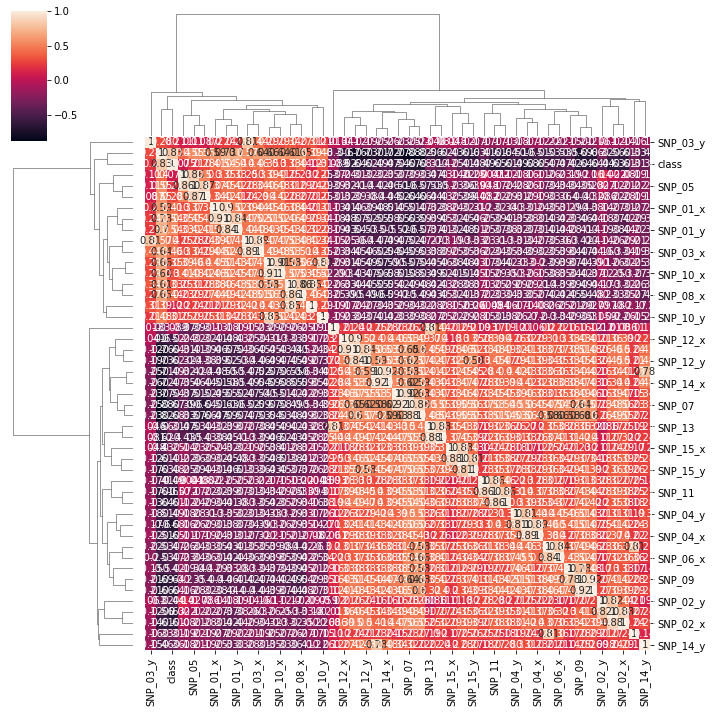

In [56]:
target = ['trait', 'SNP_01', 'SNP_02',
       'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
       'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15',
          'SNP_01_x', 'SNP_01_y', 'SNP_02_x', 'SNP_02_y', 'SNP_03_x', 'SNP_03_y',
       'SNP_04_x', 'SNP_04_y', 'SNP_05_x', 'SNP_05_y', 'SNP_06_x', 'SNP_06_y',
       'SNP_07_x', 'SNP_07_y', 'SNP_08_x', 'SNP_08_y', 'SNP_09_x', 'SNP_09_y',
       'SNP_10_x', 'SNP_10_y', 'SNP_11_x', 'SNP_11_y', 'SNP_12_x', 'SNP_12_y',
       'SNP_13_x', 'SNP_13_y', 'SNP_14_x', 'SNP_14_y', 'SNP_15_x', 'SNP_15_y','class']
sns.clustermap(train.loc[:,target].corr(),annot=True)

In [57]:
train.loc[:,target].corr()

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,...,SNP_11_y,SNP_12_x,SNP_12_y,SNP_13_x,SNP_13_y,SNP_14_x,SNP_14_y,SNP_15_x,SNP_15_y,class
trait,1.000000,0.732876,-0.558326,0.568742,-0.604016,0.548950,-0.527008,-0.876010,0.608936,-0.687985,...,-0.407154,-0.603854,-0.734348,-0.623628,-0.297535,-0.717554,-0.457579,-0.426271,-0.628027,0.826978
SNP_01,0.732876,1.000000,-0.367094,0.471602,-0.384073,0.449491,-0.432030,-0.627443,0.460054,-0.460103,...,-0.254249,-0.477589,-0.516603,-0.453028,-0.183284,-0.577320,-0.328356,-0.316938,-0.457835,0.538009
SNP_02,-0.558326,-0.367094,1.000000,-0.260399,0.405666,-0.119215,0.357868,0.478507,-0.295916,0.410250,...,0.321587,0.362162,0.453043,0.266069,-0.010919,0.337733,0.237077,0.240501,0.356857,-0.627540
SNP_03,0.568742,0.471602,-0.260399,1.000000,-0.341657,0.282002,-0.347028,-0.518701,0.526315,-0.417378,...,-0.233200,-0.247210,-0.403428,-0.300960,-0.148254,-0.491489,-0.277197,-0.187558,-0.328798,0.403247
SNP_04,-0.604016,-0.384073,0.405666,-0.341657,1.000000,-0.260659,0.456988,0.555693,-0.286681,0.513975,...,0.298498,0.324797,0.406711,0.327203,0.100099,0.419639,0.307431,0.174639,0.333513,-0.681239
SNP_05,0.548950,0.449491,-0.119215,0.282002,-0.260659,1.000000,-0.340798,-0.598221,0.308640,-0.346092,...,-0.048138,-0.319531,-0.401415,-0.495618,-0.390365,-0.455346,-0.213386,-0.226792,-0.394899,0.207899
SNP_06,-0.527008,-0.432030,0.357868,-0.347028,0.456988,-0.340798,1.000000,0.472210,-0.398591,0.490965,...,0.312294,0.308014,0.344134,0.370940,0.204767,0.376584,0.211646,0.249152,0.363433,-0.472931
SNP_07,-0.876010,-0.627443,0.478507,-0.518701,0.555693,-0.598221,0.472210,1.000000,-0.490662,0.637505,...,0.365960,0.526330,0.616383,0.552108,0.261640,0.619925,0.318986,0.392598,0.559202,-0.668755
SNP_08,0.608936,0.460054,-0.295916,0.526315,-0.286681,0.308640,-0.398591,-0.490662,1.000000,-0.485897,...,-0.129286,-0.328009,-0.446544,-0.430187,-0.259725,-0.554593,-0.361149,-0.275957,-0.369046,0.327988
SNP_09,-0.687985,-0.460103,0.410250,-0.417378,0.513975,-0.346092,0.490965,0.637505,-0.485897,1.000000,...,0.314838,0.434620,0.452541,0.418252,0.156647,0.469603,0.246285,0.232608,0.406098,-0.641171


In [8]:
# # train = pd.read_csv('./train.csv')
# target = ['trait', 'SNP_01', 'SNP_02',
#        'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
#        'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15','class'] # test 내부 컬럼이 모두 사용됬습니다.
# comp4 = train.loc[:,target]
# train4, test4 = train_test_split(comp4, test_size=0.1, random_state=21)
# train4.to_csv(f'./comp_train.csv')
# test4.to_csv(f'./comp_test.csv')

# target = [ 'id','trait','SNP_01', 'SNP_02',
#        'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
#        'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15']
# # test = pd.read_csv('./test.csv')
# tp = test.loc[:,['id']]
# test = test.loc[:,target]
# test = test.drop('id',axis=1)
# test.to_csv('./test_target.csv')

# ###############################################

# clf = ak.StructuredDataClassifier(
#     max_trials=5,  # 10회 생성
#     overwrite=True,
# )
# # 몇가지 옵션요소가 있습니다.
# # https://autokeras.com/

# clf.fit(
#     f'./comp_train.csv', # train path
#     "class", # label
#     epochs=200,
# )

# predicted_y = clf.predict(f'./comp_test.csv') # valid path
# print(clf.evaluate(f'./comp_test.csv', "class"))
# model = clf.export_model()
# pred = model.predict(pd.read_csv('./test_target.csv')) # test path

In [9]:
# train = pd.read_csv('./train.csv')
target = ['trait', 'SNP_01', 'SNP_02',
       'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
       'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15',
          'SNP_01_x', 'SNP_01_y', 'SNP_02_x', 'SNP_02_y', 'SNP_03_x', 'SNP_03_y',
       'SNP_04_x', 'SNP_04_y', 'SNP_05_x', 'SNP_05_y', 'SNP_06_x', 'SNP_06_y',
       'SNP_07_x', 'SNP_07_y', 'SNP_08_x', 'SNP_08_y', 'SNP_09_x', 'SNP_09_y',
       'SNP_10_x', 'SNP_10_y', 'SNP_11_x', 'SNP_11_y', 'SNP_12_x', 'SNP_12_y',
       'SNP_13_x', 'SNP_13_y', 'SNP_14_x', 'SNP_14_y', 'SNP_15_x', 'SNP_15_y','class'] # test 내부 컬럼이 모두 사용됬습니다.

comp4 = train.loc[:,target]
# train4, test4 = train_test_split(comp4, test_size=0.1, random_state=21)
comp4.to_csv(f'./comp_train.csv')
# test.to_csv(f'./comp_test.csv')

target = [ 'id','trait','SNP_01', 'SNP_02',
       'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
       'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15',
         'SNP_01_x', 'SNP_01_y', 'SNP_02_x', 'SNP_02_y', 'SNP_03_x', 'SNP_03_y',
       'SNP_04_x', 'SNP_04_y', 'SNP_05_x', 'SNP_05_y', 'SNP_06_x', 'SNP_06_y',
       'SNP_07_x', 'SNP_07_y', 'SNP_08_x', 'SNP_08_y', 'SNP_09_x', 'SNP_09_y',
       'SNP_10_x', 'SNP_10_y', 'SNP_11_x', 'SNP_11_y', 'SNP_12_x', 'SNP_12_y',
       'SNP_13_x', 'SNP_13_y', 'SNP_14_x', 'SNP_14_y', 'SNP_15_x', 'SNP_15_y']

# test = pd.read_csv('./test.csv')
tp = test.loc[:,['id']]
test = test.loc[:,target]
test = test.drop('id',axis=1)
test.to_csv('./test_target.csv')

###############################################

clf = ak.StructuredDataClassifier(
    max_trials=5,  # 10회 생성
    overwrite=True,
)
# 몇가지 옵션요소가 있습니다.
# https://autokeras.com/

clf.fit(
    f'./comp_train.csv', # train path
    "class", # label
    epochs=200,
)

# predicted_y = clf.predict(f'./comp_test.csv') # valid path
# print(clf.evaluate(f'./comp_test.csv', "class"))
model = clf.export_model()
pred = model.predict(pd.read_csv('./test_target.csv')) # test path

Trial 5 Complete [00h 00m 16s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 01m 07s
INFO:tensorflow:Oracle triggered exit
Epoch 1/200
9/9 [==============================] - 1s 2ms/step - loss: 1.3268 - accuracy: 0.2901
Epoch 2/200
9/9 [==============================] - 0s 2ms/step - loss: 0.9415 - accuracy: 0.4656
Epoch 3/200
9/9 [==============================] - 0s 2ms/step - loss: 0.7321 - accuracy: 0.6794
Epoch 4/200
9/9 [==============================] - 0s 2ms/step - loss: 0.6000 - accuracy: 0.8321
Epoch 5/200
9/9 [==============================] - 0s 2ms/step - loss: 0.5026 - accuracy: 0.8664
Epoch 6/200
9/9 [==============================] - 0s 2ms/step - loss: 0.4245 - accuracy: 0.8931
Epoch 7/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3598 - accuracy: 0.9046
Epoch 8/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3064 - accuracy: 0.9313
Epoch 9/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2

9/9 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 84/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 85/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 86/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 87/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 88/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 89/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 90/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 91/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 92/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 93/200
9/9 [===============

9/9 [==============================] - 0s 2ms/step - loss: 4.9234e-04 - accuracy: 1.0000
Epoch 165/200
9/9 [==============================] - 0s 2ms/step - loss: 4.8418e-04 - accuracy: 1.0000
Epoch 166/200
9/9 [==============================] - 0s 2ms/step - loss: 4.7648e-04 - accuracy: 1.0000
Epoch 167/200
9/9 [==============================] - 0s 2ms/step - loss: 4.6881e-04 - accuracy: 1.0000
Epoch 168/200
9/9 [==============================] - 0s 2ms/step - loss: 4.6125e-04 - accuracy: 1.0000
Epoch 169/200
9/9 [==============================] - 0s 2ms/step - loss: 4.5390e-04 - accuracy: 1.0000
Epoch 170/200
9/9 [==============================] - 0s 2ms/step - loss: 4.4674e-04 - accuracy: 1.0000
Epoch 171/200
9/9 [==============================] - 0s 2ms/step - loss: 4.3969e-04 - accuracy: 1.0000
Epoch 172/200
9/9 [==============================] - 0s 2ms/step - loss: 4.3285e-04 - accuracy: 1.0000
Epoch 173/200
9/9 [==============================] - 0s 2ms/step - loss: 4.2610e-04 - a

In [10]:
# print(clf.evaluate(f'./comp_test.csv', "class"))
# model = clf.export_model()
# pred = model.predict(pd.read_csv('./test_target.csv')) # test path

In [11]:
pred

array([[9.99989092e-01, 8.05971467e-06, 2.68479789e-06],
       [2.69083262e-08, 9.99999940e-01, 5.68116079e-08],
       [4.00841463e-06, 2.23475141e-08, 9.99995887e-01],
       [1.87003345e-04, 2.38990769e-01, 7.60822177e-01],
       [9.99990523e-01, 9.45322427e-06, 3.90858048e-08],
       [2.27111400e-07, 9.99980628e-01, 1.90165756e-05],
       [2.93672463e-04, 5.93930090e-05, 9.99646902e-01],
       [1.19692925e-06, 9.99964178e-01, 3.45272965e-05],
       [9.99999583e-01, 3.80683616e-07, 5.81909854e-09],
       [9.99999940e-01, 3.47615732e-08, 1.48367527e-10],
       [1.91386693e-08, 2.11891305e-09, 9.99999940e-01],
       [4.05971923e-06, 9.99990046e-01, 5.81567929e-06],
       [6.54259557e-03, 1.33792192e-01, 8.59665275e-01],
       [9.99999583e-01, 1.90231205e-07, 1.38080551e-07],
       [3.29501222e-06, 9.99835491e-01, 1.61281627e-04],
       [6.24943361e-11, 9.99999940e-01, 1.67252556e-09],
       [9.99999940e-01, 1.37772060e-08, 1.14646910e-10],
       [2.02462104e-07, 9.99986

In [12]:
aa = [le.inverse_transform([np.argmax(i)])[0] for i in pred]
tp['class'] = aa

# submission 형식을 맞춰주세요
tp = tp.set_index('id')

tp.to_csv('./comp_ans.csv')
pd.read_csv('./comp_ans.csv')['class'].value_counts()

B    85
A    51
C    39
Name: class, dtype: int64

In [13]:
# aa = []
# for i in pred:
#     if i > 0.5:
#         aa.append(0)
#     else:
#         aa.append(1)

# aa = [le.inverse_transform([i])[0] for i in aa]
# tp['class'] = aa
# tp = tp.set_index('id')


In [14]:
# tp = tp.reset_index()
# tp

In [15]:
# hi = pd.read_csv('./sample_submission.csv')
# hi

In [16]:
# hi['class'] = hi.merge(tp,on='id',how='outer').fillna('A')['class_y']
# hi = hi.set_index('id')
# hi.to_csv('./submission.csv')
# pd.read_csv('./submission.csv')

In [17]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
for idx in range(1,10):
    for i in range(len(train)):
        train.loc[i,f'SNP_0{idx}_x'] = train.loc[i,f'SNP_0{idx}'].split()[0]
        train.loc[i,f'SNP_0{idx}_y'] = train.loc[i,f'SNP_0{idx}'].split()[1]

for idx in range(10,16):
    for i in range(len(train)):
        train.loc[i,f'SNP_{idx}_x'] = train.loc[i,f'SNP_{idx}'].split()[0]
        train.loc[i,f'SNP_{idx}_y'] = train.loc[i,f'SNP_{idx}'].split()[1]

for idx in range(1,10):
    for i in range(len(test)):
        test.loc[i,f'SNP_0{idx}_x'] = test.loc[i,f'SNP_0{idx}'].split()[0]
        test.loc[i,f'SNP_0{idx}_y'] = test.loc[i,f'SNP_0{idx}'].split()[1]

for idx in range(10,16):
    for i in range(len(test)):
        test.loc[i,f'SNP_{idx}_x'] = test.loc[i,f'SNP_{idx}'].split()[0]
        test.loc[i,f'SNP_{idx}_y'] = test.loc[i,f'SNP_{idx}'].split()[1]    
        
train.columns


Index(['id', 'father', 'mother', 'gender', 'trait', 'SNP_01', 'SNP_02',
       'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
       'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15', 'class',
       'SNP_01_x', 'SNP_01_y', 'SNP_02_x', 'SNP_02_y', 'SNP_03_x', 'SNP_03_y',
       'SNP_04_x', 'SNP_04_y', 'SNP_05_x', 'SNP_05_y', 'SNP_06_x', 'SNP_06_y',
       'SNP_07_x', 'SNP_07_y', 'SNP_08_x', 'SNP_08_y', 'SNP_09_x', 'SNP_09_y',
       'SNP_10_x', 'SNP_10_y', 'SNP_11_x', 'SNP_11_y', 'SNP_12_x', 'SNP_12_y',
       'SNP_13_x', 'SNP_13_y', 'SNP_14_x', 'SNP_14_y', 'SNP_15_x', 'SNP_15_y'],
      dtype='object')

In [18]:
# train = train[train['class']!='A']
# test = test[test['trait']==2]
le = preprocessing.LabelEncoder()
tar = ['SNP_01', 'SNP_02',
       'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
       'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15',
       'SNP_01_x', 'SNP_01_y', 'SNP_02_x', 'SNP_02_y', 'SNP_03_x', 'SNP_03_y',
       'SNP_04_x', 'SNP_04_y', 'SNP_05_x', 'SNP_05_y', 'SNP_06_x', 'SNP_06_y',
       'SNP_07_x', 'SNP_07_y', 'SNP_08_x', 'SNP_08_y', 'SNP_09_x', 'SNP_09_y',
       'SNP_10_x', 'SNP_10_y', 'SNP_11_x', 'SNP_11_y', 'SNP_12_x', 'SNP_12_y',
       'SNP_13_x', 'SNP_13_y', 'SNP_14_x', 'SNP_14_y', 'SNP_15_x', 'SNP_15_y']
for col in tar:
    le.fit(test[col])
    test[col] = le.transform(test[col])
    
tar = ['SNP_01', 'SNP_02',
       'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
       'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15', 'class',
       'SNP_01_x', 'SNP_01_y', 'SNP_02_x', 'SNP_02_y', 'SNP_03_x', 'SNP_03_y',
       'SNP_04_x', 'SNP_04_y', 'SNP_05_x', 'SNP_05_y', 'SNP_06_x', 'SNP_06_y',
       'SNP_07_x', 'SNP_07_y', 'SNP_08_x', 'SNP_08_y', 'SNP_09_x', 'SNP_09_y',
       'SNP_10_x', 'SNP_10_y', 'SNP_11_x', 'SNP_11_y', 'SNP_12_x', 'SNP_12_y',
       'SNP_13_x', 'SNP_13_y', 'SNP_14_x', 'SNP_14_y', 'SNP_15_x', 'SNP_15_y']
for col in tar:
    le.fit(train[col])
    train[col] = le.transform(train[col])

In [19]:
y = train['class']
x = train.drop(['id','class'],axis=1)

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x,y)

RandomForestClassifier()

In [21]:
test = test.drop('id',axis=1)

In [39]:
pd.DataFrame(rf.predict(test)).value_counts()

1    85
0    51
2    39
dtype: int64

In [44]:
sum([np.argmax(i) for i in pred] == rf.predict(test))

171

In [43]:
sum([np.argmax(i) for i in pred] == rf.predict(test))/len(test)

0.9771428571428571